In [28]:
import pandas as pd
import numpy as np

In [29]:
sirv = pd.read_csv('modsirv.csv', sep=',', index_col=0,parse_dates=['month'])
sirv

#Escolhendo as colunas dos compartimentos para mudar de notação científica para inteiro
colunas_formatadas = ['S', 'I', 'PI', 'V', 'R', 'N']
sirv[colunas_formatadas] = sirv[colunas_formatadas].astype(int) 

In [30]:
sirv.info()
sirv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1 to 108
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    108 non-null    int64         
 1   S       108 non-null    int64         
 2   I       108 non-null    int64         
 3   PI      108 non-null    int64         
 4   V       108 non-null    int64         
 5   R       108 non-null    int64         
 6   N       108 non-null    int64         
 7   month   108 non-null    datetime64[ns]
 8   cases   91 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 8.4 KB


,time,S,I,PI,V,R,N,month,cases
1,1,1417666,1604,80,579046,1604,2000000,2014-01-01,25.0
2,2,1501441,1763,491,490795,5498,1999991,2014-02-01,34.0
3,3,1564691,2249,918,422229,9878,1999967,2014-03-01,35.0
4,4,1610646,3206,1457,368956,15644,1999911,2014-04-01,14.0
5,5,1640861,4938,2246,327563,24168,1999778,2014-05-01,13.0
...,...,...,...,...,...,...,...,...,...
104,104,1280450,72,216,556180,9921,1846841,2022-08-01,NaN
105,105,1275322,67,199,561957,9294,1846840,2022-09-01,1.0
106,106,1275405,63,183,562481,8705,1846839,2022-10-01,44.0
107,107,1288811,60,169,549642,8154,1846838,2022-11-01,NaN


Fig 1 dinamica SIRV paleta escolhida manualmente

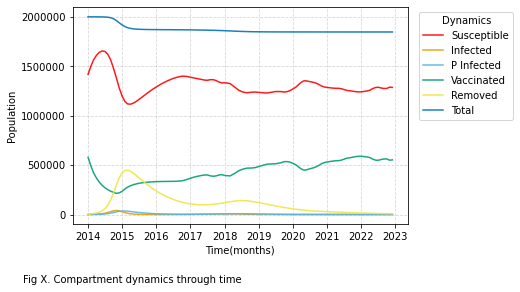

In [35]:
import matplotlib.pyplot as plt

# Definir a paleta de cores
cbPalette = ["red", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]

# Criar uma figura e um gráfico
fig, ax = plt.subplots()

# especificando quais colunas são os valores de cada compartimento
compartimentos = ['S', 'I', 'PI', 'V', 'R', 'N']

#criando objeto de labels para ser aplicado na legenda
labels = ['Susceptible', 'Infected', 'P Infected','Vaccinated', 'Removed', 'Total']

#para cada compartimento, plotar
for i, compartimento in enumerate(compartimentos):
    plt.plot(sirv['month'], sirv[compartimento], label=labels[i], color=cbPalette[i])

# Configurar o título e os rótulos dos eixos
plt.xlabel('Time(months)')
plt.ylabel('Population')

# Configurar o eixo y com os valores desejados
plt.ticklabel_format(style='plain', axis='y')
plt.yticks([0, 500000, 1000000, 1500000, 2000000])

# Adicionando grade, com tipo de linha, transparência e sobreposição
ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

# Configurando os tamnho e alpha das linhas
for line in ax.lines:
    line.set_linewidth(1.5)
    line.set_alpha(0.9)

# Configurar a posição da legenda fora da área do gráfico
legend = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
legend.set_title('Dynamics')

# Adicionado título abaixo do gráfico, fonte 10 a esquerda
fig.suptitle('Fig X. Compartment dynamics through time', fontsize=10, x=0.01, y=-0.05, ha='left')

# Salvando e visualizando
#plt.savefig('FigX_Compartment_dynamics_through_time_other_colors.png', dpi=300, bbox_inches='tight')
plt.show()

Fig 1 paleta viridis

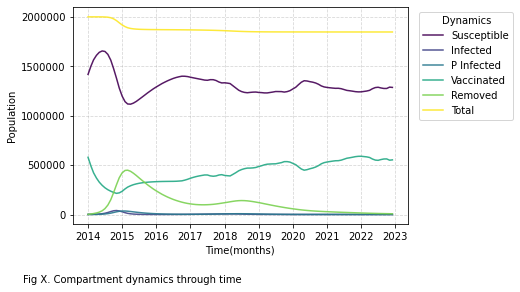

In [36]:
import matplotlib.cm as cm

# Paleta de cores
cmap = cm.get_cmap('viridis')
num_compartimentos = len(compartimentos)
values = np.linspace(0, 1, num_compartimentos)

# Criar uma figura e um gráfico
fig, ax = plt.subplots()

# Plotar as linhas para cada compartimento
compartimentos = ['S', 'I', 'PI', 'V', 'R', 'N']
labels = ['Susceptible', 'Infected', 'P Infected','Vaccinated', 'Removed', 'Total']
for i, compartimento in enumerate(compartimentos):
    plt.plot(sirv['month'], sirv[compartimento], label=labels[i], color=cmap(values[i]))

# Configurar o título e os rótulos dos eixos
plt.xlabel('Time(months)')
plt.ylabel('Population')

# Configurar o eixo y com os valores desejados
plt.ticklabel_format(style='plain', axis='y')
plt.yticks([0, 500000, 1000000, 1500000, 2000000])

# Adicionando grade, com tipo de linha, transparência e sobreposição
ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

# Configurando os tamnho e alpha das linhas
for line in ax.lines:
    line.set_linewidth(1.5)
    line.set_alpha(0.9)

# Configurar a posição da legenda fora da área do gráfico
legend = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
legend.set_title('Dynamics')

# Adicionado título abaixo do gráfico, fonte 10 a esquerda
fig.suptitle('Fig X. Compartment dynamics through time', fontsize=10, x=0.01, y=-0.05, ha='left')

# Salvando e visualizando
#plt.savefig('FigX_Compartment_dynamics_through_time_viridis.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
sirv['cases'].describe()

count     91.000000
mean      43.901099
std       57.946729
min        0.000000
25%       11.500000
50%       25.000000
75%       49.500000
max      277.000000
Name: cases, dtype: float64

Gráfico de valores simulados de I e PI, casos observados e casos previstos

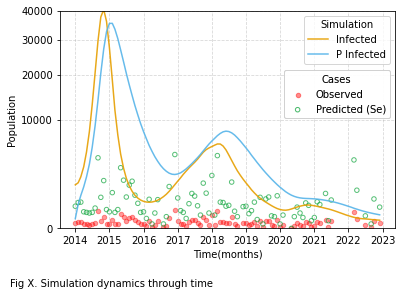

In [42]:
#import matplotlib.cm as cm
import matplotlib.ticker as ticker

# Paleta de cores, as mesmas usadas anteriormente
cbPalette = ["#E69F00", "#56B4E9"]

# Criar uma figura e um gráfico
fig, ax = plt.subplots()

# Plotar as linhas para cada compartimento
compartimentos = ['I', 'PI']
labels = ['Infected', 'P Infected']
for i, compartimento in enumerate(compartimentos):
    plt.plot(sirv['month'], sirv[compartimento], label=labels[i], color=cbPalette[i])

    
# Plotar pontos da coluna 'cases' em vermelho
observed_points = plt.scatter(sirv['month'], sirv['cases'], color='red', 
                                label='Observed', s=20, alpha=0.4,marker='o')

# Plotar pontos da coluna 'cases' multiplicados por 100/6 em cor específica
predicted_points = plt.scatter(sirv['month'], sirv['cases'] * 100 / 6, color='#10A53DFF', 
                               label='Predicted (Se)', s=20, alpha=0.7,marker='o',facecolors='none')

# Configurar o título e os rótulos dos eixos
plt.xlabel('Time(months)')
plt.ylabel('Population')

# Ajustar os limites do eixo y
ax.set_ylim(0, 40000)

# Configurar a transformação personalizada no eixo y
def transform_y(y):
    return np.sqrt(y)

def inverse_transform_y(y):
    return y ** 2

# Criar o ticker personalizado para os rótulos do eixo y
yticks = [0, 10000, 20000, 30000, 40000]
yticklabels = [str(val) for val in yticks]
yticks_transformed = transform_y(yticks)

# Definir a função de formatação para os rótulos do eixo y
def y_formatter(x, pos):
    return yticklabels[np.searchsorted(yticks_transformed, x)]

# Configurar a função de transformação inversa para obter os valores reais no eixo y
ax.yaxis.set_major_locator(ticker.FixedLocator(yticks_transformed))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_formatter))

# Ajustar a escala do eixo y
ax.set_yscale('function', functions=(transform_y, inverse_transform_y))

# Ajustar os rótulos do eixo y
yticks = [0, 10000, 20000, 30000, 40000]
yticklabels = ['0', '10000', '20000', '30000', '40000']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Adicionando grade, com tipo de linha, transparência e sobreposição
ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

# Configurando os tamanho e alpha das linhas
for line in ax.lines:
    line.set_linewidth(1.5)
    line.set_alpha(0.9)

# Criar legenda para as linhas
legend_lines = ax.legend(labels=labels, title='Simulation', loc='upper right')

# Criar legenda separada para os pontos, com bbox_to_anchor definindo manualmente a posição para que não haja
# sobreposição com a legenda de linhas, fui testando os valores manualmente
legend_points = plt.legend(handles=[observed_points, predicted_points], labels=['Observed', 'Predicted (Se)'],
                           title='Cases', loc='upper right', bbox_to_anchor=(1.0, 0.75))

# Adicionar as duas legendas ao gráfico
ax.add_artist(legend_lines)
ax.add_artist(legend_points)

# Adicionado título abaixo do gráfico, fonte 10 a esquerda
fig.suptitle('Fig X. Simulation dynamics through time', fontsize=10, x=0.01, y=-0.05, ha='left')

# Salvando e visualizando
plt.savefig('FigX_Similation_dynamics_through_time_other_pallete.png', dpi=300, bbox_inches='tight')
plt.show()

A mesma coisa mas com paleta viridis

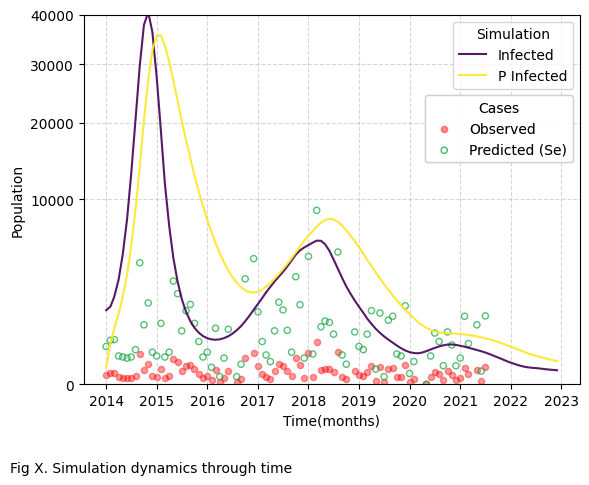

In [134]:
#import matplotlib.cm as cm
import matplotlib.ticker as ticker

# Paleta de cores
cmap = cm.get_cmap('viridis')
num_compartimentos = len(compartimentos)
values = np.linspace(0, 1, num_compartimentos)

# Criar uma figura e um gráfico
fig, ax = plt.subplots()

# Plotar as linhas para cada compartimento
compartimentos = ['I', 'PI']
labels = ['Infected', 'P Infected']
for i, compartimento in enumerate(compartimentos):
    plt.plot(sirv['month'], sirv[compartimento], label=labels[i], color=cmap(values[i]))

    
# Plotar pontos da coluna 'cases' em vermelho
observed_points = plt.scatter(sirv['month'], sirv['cases'], color='red', 
                                label='Observed', s=20, alpha=0.4,marker='o')

# Plotar pontos da coluna 'cases' multiplicados por 100/6 em cor específica
predicted_points = plt.scatter(sirv['month'], sirv['cases'] * 100 / 6, color='#10A53DFF', 
                               label='Predicted (Se)', s=20, alpha=0.7,marker='o',facecolors='none')

# Configurar o título e os rótulos dos eixos
plt.xlabel('Time(months)')
plt.ylabel('Population')

# Ajustar os limites do eixo y
ax.set_ylim(0, 40000)

# Configurar a transformação personalizada no eixo y
def transform_y(y):
    return np.sqrt(y)

def inverse_transform_y(y):
    return y ** 2

# Criar o ticker personalizado para os rótulos do eixo y
yticks = [0, 10000, 20000, 30000, 40000]
yticklabels = [str(val) for val in yticks]
yticks_transformed = transform_y(yticks)

# Definir a função de formatação para os rótulos do eixo y
def y_formatter(x, pos):
    return yticklabels[np.searchsorted(yticks_transformed, x)]

# Configurar a função de transformação inversa para obter os valores reais no eixo y
ax.yaxis.set_major_locator(ticker.FixedLocator(yticks_transformed))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_formatter))

# Ajustar a escala do eixo y
ax.set_yscale('function', functions=(transform_y, inverse_transform_y))

# Ajustar os rótulos do eixo y
yticks = [0, 10000, 20000, 30000, 40000]
yticklabels = ['0', '10000', '20000', '30000', '40000']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Adicionando grade, com tipo de linha, transparência e sobreposição
ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

# Configurando os tamnho e alpha das linhas
for line in ax.lines:
    line.set_linewidth(1.5)
    line.set_alpha(0.9)

# Criar legenda para as linhas
legend_lines = ax.legend(labels=labels, title='Simulation', loc='upper right')

# Criar legenda separada para os pontos, com bbox_to_anchor definindo manualmente a posição para que não haja
# sobreposição com a legenda de linhas, fui testando os valores manualmente
legend_points = plt.legend(handles=[observed_points, predicted_points], labels=['Observed', 'Predicted (Se)'],
                           title='Cases', loc='upper right', bbox_to_anchor=(1.0, 0.8))

# Adicionar as duas legendas ao gráfico
ax.add_artist(legend_lines)
ax.add_artist(legend_points)

# Adicionado título abaixo do gráfico, fonte 10 a esquerda
fig.suptitle('Fig X. Simulation dynamics through time', fontsize=10, x=0.01, y=-0.05, ha='left')

# Salvando e visualizando
plt.savefig('FigX_Similation_dynamics_through_time_viridis.png', dpi=300, bbox_inches='tight')
plt.show()